In [1]:
# imports and setup
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
# remove overlap in last names with n (data was scraped twice)
df_d_m = pd.read_csv('Data/Player-stats/player-stats-d-n')
df_d_m = df_d_m.drop(range(10668, 11189)) # rows hard-coded in, DANGER! (don't change raw csv files)
# df_d_m.tail(15)


In [3]:
# combine all player stats
df_a = pd.read_csv('Data/Player-stats/player-stats-a')
df_b = pd.read_csv('Data/Player-stats/player-stats-b')
df_c = pd.read_csv('Data/Player-stats/player-stats-c')
df_n_z = pd.read_csv('Data/Player-stats/player-stats-n-z')
df_player_stats = pd.concat([df_a, df_b, df_c, df_d_m, df_n_z], ignore_index=True)


In [4]:
# drop unnamed and row number columns (not meaningful data)
df_player_stats = df_player_stats.drop(df_player_stats.columns[0], 1)

# drop any season before 1980-81 (when they started tracking modern stats), should take care of the NANs
df_player_stats = df_player_stats.dropna(axis=0)

# drop any seasons where players 'Did Not Play' (overseas or retired)
df_player_stats = df_player_stats[~df_player_stats.Tm.str.contains('Did Not Play')]

In [5]:
# Seasons where players played for multiple teams appear as multiple rows, we just want total season stats
check_rows = False
drop_indices = []
name_temp = ''
season_temp = ''
for index, row in df_player_stats.iterrows():
    if check_rows & (row['Name'] == name_temp) & (row['Season'] == season_temp):
        drop_indices.append(index)
        # print(index)
    else: 
        if row['Tm'] == 'TOT':
            name_temp = row['Name']
            season_temp = row['Season']
            check_rows = True 
        else:
            check_rows = False
    if index == 100:
        break
df_player_stats = df_player_stats.drop(drop_indices)

In [6]:
# Convert all stats columns too numerical values
col_names = df_player_stats.columns
col_names = col_names[5: -2]
for string in col_names:
    df_player_stats[string] = df_player_stats[string].astype(float)

In [7]:
# print results
print(df_player_stats.shape)
print(type(df_player_stats.loc[2,'PTS']))
pd.set_option('display.max_columns', None)
df_player_stats.head(30)

(14232, 32)
<class 'numpy.float64'>


,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name,All Star
2,1992-93,24.0,TOT,NBA,PF,75.0,52.0,17.5,3.3,6.3,0.518,0.0,0.0,0.000,3.3,6.3,0.519,0.518,1.2,1.5,0.759,1.7,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,Alaa Abdelnaby,0.0
6,1994-95,26.0,TOT,NBA,PF,54.0,0.0,9.4,2.2,4.3,0.511,0.0,0.0,0.000,2.2,4.2,0.515,0.511,0.4,0.6,0.571,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,Alaa Abdelnaby,0.0
21,1981-82,34.0,LAL,NBA,C,76.0,76.0,35.2,9.9,17.1,0.579,0.0,0.0,0.000,9.9,17.1,0.580,0.579,4.1,5.8,0.706,2.3,6.4,8.7,3.0,0.8,2.7,3.0,2.9,23.9,Kareem Abdul-Jabbar,1.0
22,1982-83,35.0,LAL,NBA,C,79.0,79.0,32.3,9.1,15.5,0.588,0.0,0.0,0.000,9.1,15.5,0.589,0.588,3.5,4.7,0.749,2.1,5.4,7.5,2.5,0.8,2.2,2.5,2.8,21.8,Kareem Abdul-Jabbar,1.0
23,1983-84,36.0,LAL,NBA,C,80.0,80.0,32.8,9.0,15.5,0.578,0.0,0.0,0.000,9.0,15.5,0.579,0.578,3.6,4.9,0.723,2.1,5.2,7.3,2.6,0.7,1.8,2.8,2.6,21.5,Kareem Abdul-Jabbar,1.0
24,1984-85,37.0,LAL,NBA,C,79.0,79.0,33.3,9.2,15.3,0.599,0.0,0.0,0.000,9.2,15.3,0.600,0.599,3.7,5.0,0.732,2.1,5.8,7.9,3.2,0.8,2.1,2.5,3.0,22.0,Kareem Abdul-Jabbar,1.0
25,1985-86,38.0,LAL,NBA,C,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,Kareem Abdul-Jabbar,1.0
26,1986-87,39.0,LAL,NBA,C,78.0,78.0,31.3,7.2,12.7,0.564,0.0,0.0,0.333,7.2,12.7,0.565,0.564,3.1,4.4,0.714,1.9,4.8,6.7,2.6,0.6,1.2,2.4,3.1,17.5,Kareem Abdul-Jabbar,1.0
27,1987-88,40.0,LAL,NBA,C,80.0,80.0,28.9,6.0,11.3,0.532,0.0,0.0,0.000,6.0,11.3,0.532,0.532,2.6,3.4,0.762,1.5,4.5,6.0,1.7,0.6,1.2,2.0,2.7,14.6,Kareem Abdul-Jabbar,1.0
28,1988-89,41.0,LAL,NBA,C,74.0,74.0,22.9,4.2,8.9,0.475,0.0,0.0,0.000,4.2,8.9,0.477,0.475,1.6,2.2,0.739,1.4,3.1,4.5,1.0,0.5,1.1,1.3,2.6,10.1,Kareem Abdul-Jabbar,1.0


# Now let's add some more categorical columns to judge superstardom #
We already have all star nods, lets grab all NBA and MVP awards as well.

In [8]:
# MVP Winners
dict_mvp = {'Season': ['2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', '2012-13', 
                       '2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05',
                       '2003-04', '2002-03', '2001-02', '2000-01', '1999-00', '1998-99', '1997-98', '1996-97',
                       '1995-96', '1994-95', '1993-94', '1992-93', '1991-92', '1990-91', '1989-90', '1988-89',
                       '1987-88', '1986-87', '1985-86', '1984-85', '1983-84', '1982-83', '1981-82', '1980-81',
                       '1979-80' ],
            'Winner': ['Giannis Antetokounmpo', 'Giannis Antetokounmpo', 'James Harden', 'Russell Westbrook', 
                       'Stephen Curry', 'Stephen Curry', 'Kevin Durant', ' LeBron James', 'LeBron James', 
                       'Derrick Rose','LeBron James', 'LeBron James', 'Kobe Bryant', 'Dirk Nowitzki', 'Steve Nash',
                       'Steve Nash', 'Kevin Garnett', 'Tim Duncan', 'Tim Duncan', 'Allen Iverson', 'Shaquille O\'Neal',
                       'Karl Malone', 'Michael Jordan','Karl Malone', 'Michael Jordan', 'David Robinson',
                       'Hakeem Olajuwon', 'Charles Barkley', 'Michael Jordan', 'Michael Jordan', 'Magic Johnson',
                       'Magic Johnson', 'Michael Jordan', 'Magic Johnson', 'Larry Bird', 'Larry Bird', 'Larry Bird',
                       'Moses Malone', 'Moses Malone', 'Julius Erving', 'Kareem Abdul-Jabbar']
            }
df_mvp_names = pd.DataFrame(dict_mvp)

# Add the info from the above df into the player stats df 
df_player_stats['MVP'] = 0
for index, row in df_mvp_names.iterrows():
    #print('season:' + row[0] + '.')
    #print('player:' + row[1] + '.')
    #print(df_player_stats.loc[(df_player_stats['Name'] == row[1]) & (df_player_stats['Season'] == row[0])])
    df_player_stats.loc[(df_player_stats['Name'] == row[1]) & (df_player_stats['Season'] == row[0]), 'MVP'] = 1

df_player_stats.loc[df_player_stats['MVP'] == 1].head(30)



,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name,All Star,MVP
667,2018-19,24.0,MIL,NBA,PF,72.0,72.0,32.8,10.0,17.3,0.578,0.7,2.8,0.256,9.3,14.5,0.641,0.599,6.9,9.5,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,Giannis Antetokounmpo,1.0,1
668,2019-20,25.0,MIL,NBA,PF,63.0,63.0,30.4,10.9,19.7,0.553,1.4,4.7,0.304,9.5,15.0,0.631,0.589,6.3,10.0,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,Giannis Antetokounmpo,1.0,1
1286,1992-93,29.0,PHO,NBA,PF,76.0,76.0,37.6,9.4,18.1,0.520,0.9,2.9,0.305,8.5,15.2,0.561,0.545,5.9,7.7,0.765,3.1,9.1,12.2,5.1,1.6,1.0,3.1,2.6,25.6,Charles Barkley,1.0,1
1946,1983-84,27.0,BOS,NBA,PF,79.0,77.0,38.3,9.6,19.5,0.492,0.2,0.9,0.247,9.4,18.6,0.504,0.497,4.7,5.3,0.888,2.3,7.8,10.1,6.6,1.8,0.9,3.0,2.5,24.2,Larry Bird,1.0,1
1947,1984-85,28.0,BOS,NBA,SF,80.0,77.0,39.5,11.5,22.0,0.522,0.7,1.6,0.427,10.8,20.4,0.529,0.538,5.0,5.7,0.882,2.1,8.5,10.5,6.6,1.6,1.2,3.1,2.6,28.7,Larry Bird,1.0,1
1948,1985-86,29.0,BOS,NBA,SF,82.0,81.0,38.0,9.7,19.6,0.496,1.0,2.4,0.423,8.7,17.2,0.506,0.521,5.4,6.0,0.896,2.3,7.5,9.8,6.8,2.0,0.6,3.2,2.2,25.8,Larry Bird,1.0,1
3127,2007-08,29.0,LAL,NBA,SG,82.0,82.0,38.9,9.5,20.6,0.459,1.8,5.1,0.361,7.6,15.5,0.490,0.503,7.6,9.0,0.840,1.1,5.2,6.3,5.4,1.8,0.5,3.1,2.8,28.3,Kobe Bryant,1.0,1
5072,2014-15,26.0,GSW,NBA,PG,80.0,80.0,32.7,8.2,16.8,0.487,3.6,8.1,0.443,4.6,8.7,0.528,0.594,3.9,4.2,0.914,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8,Stephen Curry,1.0,1
5073,2015-16,27.0,GSW,NBA,PG,79.0,79.0,34.2,10.2,20.2,0.504,5.1,11.2,0.454,5.1,9.0,0.566,0.630,4.6,5.1,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,Stephen Curry,1.0,1
6217,2001-02,25.0,SAS,NBA,PF,82.0,82.0,40.6,9.3,18.3,0.508,0.0,0.1,0.100,9.3,18.2,0.511,0.508,6.8,8.5,0.799,3.3,9.4,12.7,3.7,0.7,2.5,3.2,2.6,25.5,Tim Duncan,1.0,1


In [9]:
# All NBA winners
df_player_stats['All NBA'] = 0

# Import all-nba data csv
df_all_nba = pd.read_csv('Data/Player-stats/All-NBA-stats.csv')

# Extract info and update in player stats table
for index, row in df_all_nba.iterrows():
    year = row[0]
    if row[2] == '1st':
        team = 1
    elif row[2] == '2nd':
        team = 2
    else:
        team = 3
    # print(year, team)
    for i in range(3, 8):
        player = row[i].split(' ')[0] + ' ' + row[i].split(' ')[1]
        df_player_stats.loc[(df_player_stats['Season'] == year) & (df_player_stats['Name'] == player), 'All NBA'] = team
        
df_player_stats.head(10)       
        

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name,All Star,MVP,All NBA
2,1992-93,24.0,TOT,NBA,PF,75.0,52.0,17.5,3.3,6.3,0.518,0.0,0.0,0.000,3.3,6.3,0.519,0.518,1.2,1.5,0.759,1.7,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,Alaa Abdelnaby,0.0,0,0
6,1994-95,26.0,TOT,NBA,PF,54.0,0.0,9.4,2.2,4.3,0.511,0.0,0.0,0.000,2.2,4.2,0.515,0.511,0.4,0.6,0.571,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,Alaa Abdelnaby,0.0,0,0
21,1981-82,34.0,LAL,NBA,C,76.0,76.0,35.2,9.9,17.1,0.579,0.0,0.0,0.000,9.9,17.1,0.580,0.579,4.1,5.8,0.706,2.3,6.4,8.7,3.0,0.8,2.7,3.0,2.9,23.9,Kareem Abdul-Jabbar,1.0,0,0
22,1982-83,35.0,LAL,NBA,C,79.0,79.0,32.3,9.1,15.5,0.588,0.0,0.0,0.000,9.1,15.5,0.589,0.588,3.5,4.7,0.749,2.1,5.4,7.5,2.5,0.8,2.2,2.5,2.8,21.8,Kareem Abdul-Jabbar,1.0,0,2
23,1983-84,36.0,LAL,NBA,C,80.0,80.0,32.8,9.0,15.5,0.578,0.0,0.0,0.000,9.0,15.5,0.579,0.578,3.6,4.9,0.723,2.1,5.2,7.3,2.6,0.7,1.8,2.8,2.6,21.5,Kareem Abdul-Jabbar,1.0,0,1
24,1984-85,37.0,LAL,NBA,C,79.0,79.0,33.3,9.2,15.3,0.599,0.0,0.0,0.000,9.2,15.3,0.600,0.599,3.7,5.0,0.732,2.1,5.8,7.9,3.2,0.8,2.1,2.5,3.0,22.0,Kareem Abdul-Jabbar,1.0,0,2
25,1985-86,38.0,LAL,NBA,C,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,Kareem Abdul-Jabbar,1.0,0,1
26,1986-87,39.0,LAL,NBA,C,78.0,78.0,31.3,7.2,12.7,0.564,0.0,0.0,0.333,7.2,12.7,0.565,0.564,3.1,4.4,0.714,1.9,4.8,6.7,2.6,0.6,1.2,2.4,3.1,17.5,Kareem Abdul-Jabbar,1.0,0,0
27,1987-88,40.0,LAL,NBA,C,80.0,80.0,28.9,6.0,11.3,0.532,0.0,0.0,0.000,6.0,11.3,0.532,0.532,2.6,3.4,0.762,1.5,4.5,6.0,1.7,0.6,1.2,2.0,2.7,14.6,Kareem Abdul-Jabbar,1.0,0,0
28,1988-89,41.0,LAL,NBA,C,74.0,74.0,22.9,4.2,8.9,0.475,0.0,0.0,0.000,4.2,8.9,0.477,0.475,1.6,2.2,0.739,1.4,3.1,4.5,1.0,0.5,1.1,1.3,2.6,10.1,Kareem Abdul-Jabbar,1.0,0,0


In [10]:
df_player_stats.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,All Star,MVP,All NBA
count,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000
mean,26.653738,57.825885,28.949410,22.086242,3.516533,7.748173,0.442402,0.546550,1.577445,0.259057,2.969063,6.169899,0.469487,0.478101,1.741646,2.294407,0.741649,1.034331,2.680663,3.713687,2.181387,0.746852,0.412458,1.362992,1.997583,9.320018,0.065416,0.002740,0.073215
std,4.047619,22.603605,29.920967,9.624379,2.262015,4.653134,0.067977,0.666426,1.744593,0.167401,2.125568,4.182096,0.073565,0.067951,1.466041,1.841925,0.124255,0.858132,1.802623,2.532319,1.932642,0.471054,0.489486,0.822442,0.808728,6.070107,0.247267,0.052278,0.399890
min,18.000000,1.000000,0.000000,2.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,42.000000,2.000000,14.200000,1.700000,4.000000,0.407000,0.000000,0.100000,0.150000,1.300000,2.900000,0.435000,0.447000,0.700000,0.900000,0.685000,0.400000,1.400000,1.900000,0.800000,0.400000,0.100000,0.700000,1.400000,4.500000,0.000000,0.000000,0.000000
50%,26.000000,65.000000,16.000000,21.800000,3.000000,6.700000,0.444000,0.300000,0.900000,0.306000,2.400000,5.100000,0.473000,0.483000,1.300000,1.700000,0.760000,0.800000,2.300000,3.100000,1.600000,0.700000,0.300000,1.200000,2.000000,7.900000,0.000000,0.000000,0.000000
75%,29.000000,78.000000,58.000000,30.300000,4.900000,10.700000,0.481000,0.900000,2.600000,0.366000,4.200000,8.600000,0.508000,0.517000,2.400000,3.100000,0.820000,1.400000,3.500000,4.900000,2.900000,1.000000,0.500000,1.800000,2.600000,12.900000,0.000000,0.000000,0.000000
max,43.000000,85.000000,83.000000,43.700000,13.400000,27.800000,0.768000,5.100000,13.200000,1.000000,13.200000,27.000000,1.000000,0.900000,10.300000,13.100000,1.000000,6.900000,12.300000,18.700000,14.500000,3.700000,5.000000,5.700000,5.000000,37.100000,1.000000,1.000000,3.000000


In [11]:
#Visualize Scatter
# scatter_matrix(df_player_stats, alpha=0.2, figsize = (20, 20))
# print()

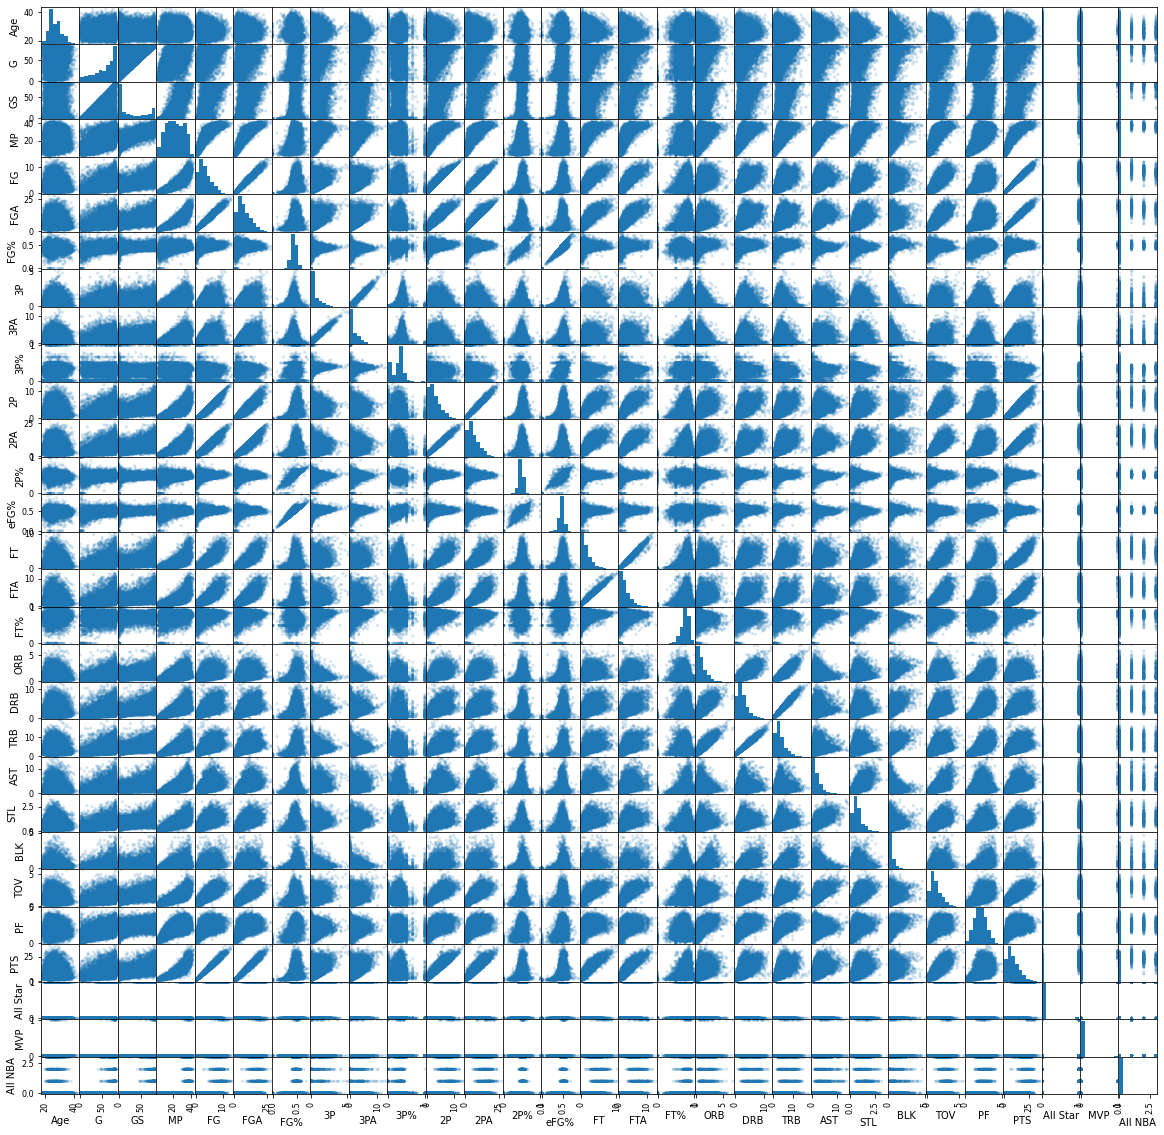

In [12]:
# plot the correlation matrix to visualize relationships
scatter_matrix(df_player_stats, alpha=0.2, figsize = (20, 20))
print()

In [13]:
# Compute the correlation of all the variables
corr = df_player_stats.corr()
corr.head(30)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,All Star,MVP,All NBA
Age,1.000000,0.057183,0.052246,0.093905,0.022367,0.026300,0.002385,0.077849,0.065421,0.054584,-0.000527,0.001974,-0.011033,0.052257,0.008494,-0.014149,0.117740,-0.028882,0.062214,0.034506,0.081788,0.027224,-0.024604,-0.004192,0.027213,0.027253,0.060336,0.014779,0.025996
G,0.057183,1.000000,0.582871,0.580466,0.483004,0.457551,0.403996,0.138702,0.114807,0.043035,0.470280,0.460982,0.280664,0.358664,0.388235,0.388892,0.173992,0.356633,0.406755,0.410585,0.320330,0.414676,0.265805,0.421043,0.510030,0.469578,0.180944,0.046133,0.135442
GS,0.052246,0.582871,1.000000,0.835077,0.747922,0.732926,0.332420,0.250010,0.244640,0.051024,0.717584,0.713393,0.246593,0.284924,0.633481,0.637374,0.158036,0.477966,0.634300,0.613693,0.531589,0.608329,0.382534,0.682451,0.591362,0.738169,0.381451,0.085173,0.275992
MP,0.093905,0.580466,0.835077,1.000000,0.884211,0.890536,0.355747,0.398662,0.402671,0.127902,0.816088,0.823017,0.279011,0.354570,0.754199,0.753754,0.248887,0.494316,0.707442,0.671203,0.636124,0.727166,0.379880,0.809251,0.689043,0.885243,0.380015,0.083731,0.276307
FG,0.022367,0.483004,0.747922,0.884211,1.000000,0.981932,0.413891,0.345220,0.347194,0.109582,0.955947,0.947889,0.324491,0.367055,0.849390,0.846024,0.251859,0.482370,0.663693,0.636010,0.564178,0.638061,0.376844,0.821665,0.591223,0.988504,0.507394,0.144310,0.375209
FGA,0.026300,0.457551,0.732926,0.890536,0.981932,1.000000,0.279076,0.429870,0.443989,0.150368,0.910448,0.927618,0.214368,0.270313,0.837564,0.824597,0.282429,0.404525,0.616547,0.576051,0.595907,0.656621,0.311915,0.826995,0.558048,0.981576,0.477866,0.130719,0.352252
FG%,0.002385,0.403996,0.332420,0.355747,0.413891,0.279076,1.000000,-0.126442,-0.181880,-0.065178,0.479515,0.386119,0.841619,0.846939,0.313756,0.350119,-0.030262,0.494250,0.431944,0.475147,0.100505,0.195921,0.385381,0.281012,0.437409,0.370658,0.177760,0.048214,0.134862
3P,0.077849,0.138702,0.250010,0.398662,0.345220,0.429870,-0.126442,1.000000,0.984772,0.507210,0.055205,0.067817,0.020306,0.299884,0.215517,0.156276,0.312355,-0.257157,0.095964,-0.019079,0.331891,0.290214,-0.139552,0.233743,0.021818,0.418855,0.146377,0.038694,0.096926
3PA,0.065421,0.114807,0.244640,0.402671,0.347194,0.443989,-0.181880,0.984772,1.000000,0.475959,0.061669,0.077329,0.010405,0.232492,0.226701,0.168857,0.305702,-0.266067,0.094116,-0.023396,0.354025,0.309693,-0.147529,0.253249,0.014919,0.421475,0.144747,0.037044,0.098165
3P%,0.054584,0.043035,0.051024,0.127902,0.109582,0.150368,-0.065178,0.507210,0.475959,1.000000,-0.042177,-0.030781,-0.047449,0.255323,0.029151,-0.018330,0.237513,-0.289013,-0.083098,-0.157375,0.181201,0.124651,-0.204090,0.042197,-0.117240,0.144465,0.037296,0.008421,0.022727


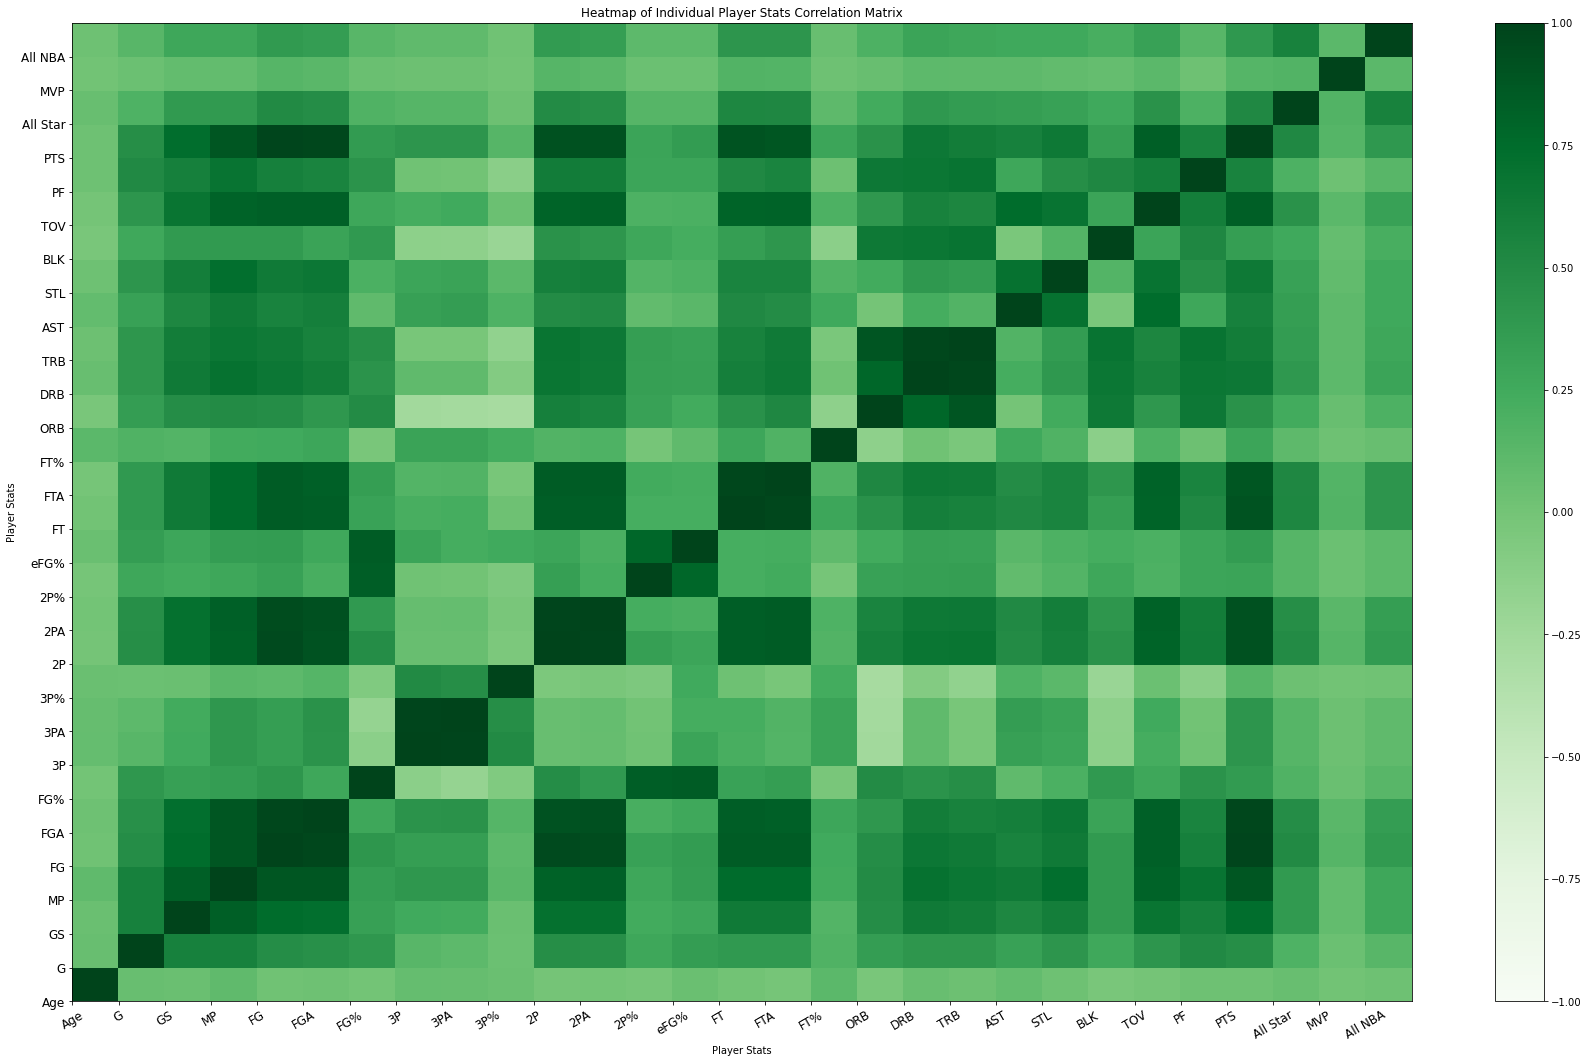

In [14]:
# Heat Map
names = corr.columns.to_list()
fig_hm = plt.figure(figsize=(30, 18))
heatmap = plt.pcolor(corr, vmin=-1, vmax=1, cmap=plt.cm.Greens)
plt.xticks(range(corr.shape[0]), labels=names, rotation=30, fontsize='large')
plt.yticks(range(corr.shape[0]), labels=names, fontsize='large')
plt.title("Heatmap of Individual Player Stats Correlation Matrix")
plt.xlabel("Player Stats")
plt.ylabel("Player Stats")
plt.colorbar(heatmap)
plt.show()

In [15]:
ols1 = sm.ols(formula="FT ~ FG", data=df_player_stats).fit()
# ols1.summary()

ols2 = sm.ols(formula="PTS ~ MP", data=df_player_stats).fit()
# ols2.summary()

ols3 = sm.ols(formula="PTS ~ TOV", data=df_player_stats).fit()
# ols3.summary()

ols4 = sm.ols(formula="FGA ~ FTA", data=df_player_stats).fit()
# ols4.summary()

In [17]:
df_new = df_player_stats.rename(columns={ 'FG%': 'FGP'})

ols5 = sm.ols(formula="MP ~ G + GS + FG + FGP + TRB + AST + TOV + PTS", data=df_new).fit()
ols5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MP   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:46:20   Log-Likelihood:                -36577.
No. Observations:               14232   AIC:                         7.317e+04
Df Residuals:                   14223   BIC:                         7.324e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8016      0.191     46.014      0.000       8.427       9.177
G              0.0472      0.002     31.422      0.000       0.044       0.050
GS             0.0746      0.002     47.811      0.000       0.071       0.078
FG             0.1944      0.084      2.309      0.021       0.029       0.359
FGP           -6.9442      0.481    -14.426      0.000      -7.888      -6.001
TRB            0.7825      0.017     46.957      0.000       0.750       0.815
AST            1.0036      0.024     41.981      0.000       0.957       1.051
TOV           -0.3195      0.076     -4.193      0.000      -0.469      -0.170
PTS            0.6571      0.031     21.295      0.000       0.597       0.718
==============================================================================
Omnibus:                      310.720   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.658
Skew:                           0.071   Prob(JB):                    1.92e-147
Kurtosis:                       4.058   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
df_new = df_player_stats.rename(columns={ 'FG%': 'FGP', 'All Star': 'AllStar', 'All NBA': 'AllNBA'})

ols6 = sm.ols(formula="AllNBA ~ G + GS + FG + FGP + TRB + AST + TOV + PTS", data=df_new).fit()
ols6.summary()

ols7 = sm.ols(formula="AllStar ~ G + GS + FG + FGP + TRB + AST + TOV + PTS", data=df_new).fit()
ols7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AllStar   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     753.9
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:47:24   Log-Likelihood:                 2207.9
No. Observations:               14232   AIC:                            -4398.
Df Residuals:                   14223   BIC:                            -4330.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1101      0.013     -8.782      0.000      -0.135      -0.086
G             -0.0011   9.85e-05    -10.980      0.000      -0.001      -0.001
GS            -0.0002      0.000     -1.811      0.070      -0.000    1.52e-05
FG            -0.0508      0.006     -9.212      0.000      -0.062      -0.040
FGP            0.0093      0.032      0.294      0.769      -0.053       0.071
TRB            0.0173      0.001     15.875      0.000       0.015       0.019
AST            0.0214      0.002     13.691      0.000       0.018       0.025
TOV           -0.0360      0.005     -7.204      0.000      -0.046      -0.026
PTS            0.0382      0.002     18.882      0.000       0.034       0.042
==============================================================================
Omnibus:                     5578.004   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24396.942
Skew:                           1.906   Prob(JB):                         0.00
Kurtosis:                       8.158   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""